In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
(X_train_full, y_train_full), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_train1, X_train2 = X_train_full[:-1000], X_train_full[-1000:]
y_train1, y_train2 = y_train_full[:-1000], y_train_full[-1000:]

In [3]:
#Dataset
print('X_train_full: ' + str(X_train_full.shape))
print('y_train_full: ' + str(y_train_full.shape))
print('X_valid: ' + str(X_valid.shape))
print('y_valid: ' + str(y_valid.shape))
print( len(X_train1))
print( len(X_train2))
print( len(y_train1))
print( len(y_train2))
print(X_train1.shape)
print(X_train2.shape)
print(y_train2.shape)
y_valid

X_train_full: (60000, 28, 28)
y_train_full: (60000,)
X_valid: (10000, 28, 28)
y_valid: (10000,)
59000
1000
59000
1000
(59000, 28, 28)
(1000, 28, 28)
(1000,)


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

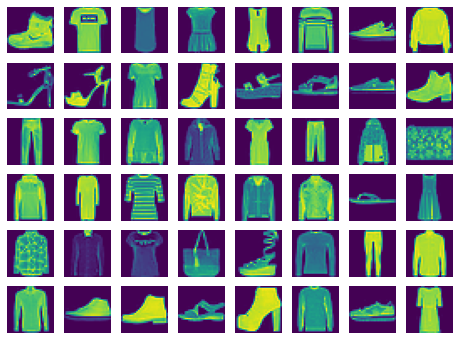

In [4]:
#Display some sample images dataset from the training dataset in a 6 × 8 grid
plt.figure(figsize=(8 , 6 ))
for row in range(6):
    for column in range(8):
        i = 8 * row + column
        plt.subplot(6, 8, i+1)
        plt.imshow(X_train1[i])
        
        plt.axis('off')
plt.show()

In [5]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [6]:
#Building Model 1
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2), #stadev (0.2), adding noising layer
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
model1 = keras.models.Sequential([conv_encoder, conv_decoder])

model1.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),metrics=["accuracy"])
history_model1 = model1.fit(X_train1, X_train1, epochs=20,validation_data=(X_valid, X_valid))

Epoch 1/20
1844/1844 [==============================] - 230s 124ms/step - loss: 0.3054 - accuracy: 0.1460 - val_loss: 0.2823 - val_accuracy: 0.1882
Epoch 2/20
1844/1844 [==============================] - 166s 90ms/step - loss: 0.2815 - accuracy: 0.1823 - val_loss: 0.2772 - val_accuracy: 0.2181
Epoch 3/20
1844/1844 [==============================] - 141s 77ms/step - loss: 0.2776 - accuracy: 0.2015 - val_loss: 0.2741 - val_accuracy: 0.2338
Epoch 4/20
1844/1844 [==============================] - 191s 103ms/step - loss: 0.2754 - accuracy: 0.2141 - val_loss: 0.2774 - val_accuracy: 0.2579
Epoch 5/20
1844/1844 [==============================] - 191s 104ms/step - loss: 0.2738 - accuracy: 0.2232 - val_loss: 0.2708 - val_accuracy: 0.2598
Epoch 6/20
1844/1844 [==============================] - 221s 120ms/step - loss: 0.2727 - accuracy: 0.2304 - val_loss: 0.2750 - val_accuracy: 0.2807
Epoch 7/20
1844/1844 [==============================] - 127s 69ms/step - loss: 0.2718 - accuracy: 0.2358 - val_los

In [7]:
#Cloning model 1's encoder part
conv_encoder_clone =keras.models.clone_model(conv_encoder)
conv_encoder_clone.trainable = False

In [8]:
#Building Model 2
tf.random.set_seed(42)
np.random.seed(42)

model2 = keras.models.Sequential([
conv_encoder_clone,
keras.layers.Flatten(),
keras.layers.Dense(30, activation="selu"),
keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=0.02), metrics=["accuracy"])

In [9]:
history_model2 = model2.fit(X_train2, y_train2, epochs=50,validation_data=(X_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 1s 28ms/step - loss: 2.1591 - accuracy: 0.2280 - val_loss: 2.0332 - val_accuracy: 0.1437
Epoch 2/50
32/32 [==============================] - 1s 23ms/step - loss: 1.9014 - accuracy: 0.4140 - val_loss: 1.8278 - val_accuracy: 0.4445
Epoch 3/50
32/32 [==============================] - 1s 23ms/step - loss: 1.7156 - accuracy: 0.5220 - val_loss: 1.6393 - val_accuracy: 0.4723
Epoch 4/50
32/32 [==============================] - 1s 22ms/step - loss: 1.5591 - accuracy: 0.6060 - val_loss: 1.5227 - val_accuracy: 0.4905
Epoch 5/50
32/32 [==============================] - 1s 22ms/step - loss: 1.4257 - accuracy: 0.6080 - val_loss: 1.4010 - val_accuracy: 0.6312
Epoch 6/50
32/32 [==============================] - 1s 24ms/step - loss: 1.3209 - accuracy: 0.6450 - val_loss: 1.3057 - val_accuracy: 0.6297
Epoch 7/50
32/32 [==============================] - 1s 22ms/step - loss: 1.2227 - accuracy: 0.6570 - val_loss: 1.2277 - val_accuracy: 0.6646
Epoch 8/50
32

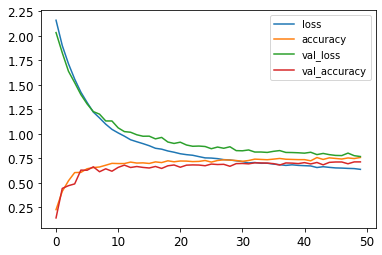

In [10]:
import pandas as pd
pd.DataFrame(history_model2.history).plot()
plt.show()

In [11]:
#Building Model 3
tf.random.set_seed(42)
np.random.seed(42)

model3 = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2), #stadev (0.2), adding noising layer
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=0.02), metrics=["accuracy"])

In [12]:
history_model3 = model3.fit(X_train2, y_train2, epochs=50,validation_data=(X_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 2s 43ms/step - loss: 1.9127 - accuracy: 0.3910 - val_loss: 1.7152 - val_accuracy: 0.3979
Epoch 2/50
32/32 [==============================] - 1s 29ms/step - loss: 1.1570 - accuracy: 0.6110 - val_loss: 1.6374 - val_accuracy: 0.4053
Epoch 3/50
32/32 [==============================] - 1s 31ms/step - loss: 0.9354 - accuracy: 0.6600 - val_loss: 0.9235 - val_accuracy: 0.6804
Epoch 4/50
32/32 [==============================] - 1s 31ms/step - loss: 0.7925 - accuracy: 0.7160 - val_loss: 1.0216 - val_accuracy: 0.6577
Epoch 5/50
32/32 [==============================] - 1s 29ms/step - loss: 0.7352 - accuracy: 0.7100 - val_loss: 1.2477 - val_accuracy: 0.5904
Epoch 6/50
32/32 [==============================] - 5s 145ms/step - loss: 0.7095 - accuracy: 0.7220 - val_loss: 0.7616 - val_accuracy: 0.7124
Epoch 7/50
32/32 [==============================] - 1s 30ms/step - loss: 0.6428 - accuracy: 0.7590 - val_loss: 0.7411 - val_accuracy: 0.7217
Epoch 8/50
3

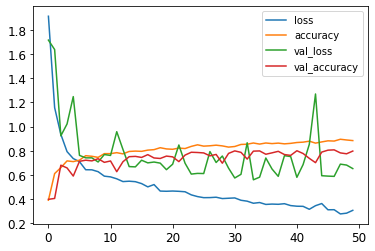

In [13]:
pd.DataFrame(history_model3.history).plot()
plt.show()

# According to training result & graph visualization of Model#2 & Model#3, Model#3 gives more val_accuracy ( last epoch: 0.7973) than model#2 val_accuracy (last epoch: 0.7149)